# Introduce clustering

今天要介紹的分群 （clustering） 是屬於無監督學習 （unsupervised learning） 的方法，這種方法實在太好用啦，我們來談談他到底好在哪

### 先有靶再射箭 : supervised learning

課上到現在，大家對於 supervised learning 的手法應該都有一定的了解，
要訓練模型需要 $X$ 與 $y$ ， $y$ 就是我們的靶，我們的目標，
你如果有工作過就會發現，很多時候你可以收集到許多資料，
例如一堆照片，一堆影片（監視錄影機拍的），或很多客戶表單資料，
或是前人遺留的珍貴紀錄檔，但是唯獨缺的就是這些散亂資料沒有什麼意義，
也沒有目標，連公司主管或老闆其實都沒什麼概念，根本不知道能拿它來做什麼
只會跟你說：你就看看這些豐富的資料能夠分析出什麼名堂，
美其名曰 "如果我先跟你說要做什麼，就會限制你的表現，會讓你綁手綁腳無法發揮"， 
所以面對現實，當你接手要做 supervised learning 時，首先要面對的問題就是將意義與目的先設定好。
我在這邊分享一個我的真實經歷， 某天在工作中老闆交待說要跟其他公司合作，今天下午就去找OOXX洽談合作內容，
我們的專案目標就是要合作開發5G大數據，為了保護當事人細節都被和諧了， 目標內容都想好了，
你就去跟對方談好細節，我就想說，好吧看我能在這裡幫到什麼，
然後下午兩方人馬見面互相乾瞪眼，都以為對方都已規劃好，自己只是輔助一些技術細節就好，看看自己能夠提供什麼幫助， 
原來兩方老闆都只是粗淺瞭解認為5G大數據很紅，
未來商業發展潛力無限，毫無規劃下就這樣驟然決定要做，好了兩方老闆都以為完事了， 
對於產品、行銷、技術等等細節完全沒有想過，都以為對方會去搞定，更有趣的是連資金都還沒到位就急著開跑。



### 先射箭再畫靶 : unsupervised learning

如果今天有個工具是不需要先給定目標，他就可以自己幫你預測，假設老闆跟你說，我們今年想推一款新產品，或是有個新的行銷企劃， 
來，這是之前顧客留下的資料，你設法挑一些適合的顧客來試試水溫，哇啊！你這時還不會跳起來喔，難到要把公司所有的資料都看過一遍再去做分類， 
如果你還敢很白目地問老闆：那要給誰先來試用看看，是去IG、FB貼文發問收集有意願的人嗎？ 
老闆這時只會罵說：真是廢物，這種瑣事還來問我！如果用發文徵詢的笨方式，要是潛在客戶最近很忙沒看到怎麼辦？
這時候如果你已經上過課了，就可以採用今天要教的分群 （clustering） 技巧，
你先把顧客分個 5 群好了，再分別察看這 5 群的資料有些什麼顯著特性，
例如可以用年紀、收入、教育等較通俗的條件去帶入，然後就可以跟老闆報告，這次要行銷或要推的新產品，特別適合XX族群，我挑出了一些候選名單OOO人， 
可以先拿去試試水溫，然後你就可以等著試用者的反饋資料去做進一步分析。



下面先來看看不同算法的效果

![overview](../../../images/sphx_glr_plot_cluster_comparison_001.png)




# K-means

因為 K-means 很泛用，所以我們會先介紹 K-means 給大家，
K-means 的參數要決定幾類 （number of clusters），可擴展性 ``n_samples`` 很大， ``n_clusters`` 中等。



下面我們看看 k-means 實際上是如何執行分群的。

## steps

1. 先決定 $k$，就可以決定要分幾群。 
2. 隨機選 $k$ 個點，下面的例子是取兩個點 藍點 跟紅點。
3. 把靠近藍點的點都歸給藍色那一群，把靠近紅點的點都歸給紅色那一群。
4. 重算新的中心點。
5. 重複 3. 跟 4. 直到收斂。


![kmeans](../../../images/kmeans.drawio.png)


下面進入實戰

In [1]:
# 做 Iris 的分群
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np

X, y = datasets.load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=87) 


cluster_model = KMeans(n_clusters=3, random_state=87).fit(X_train)

print('True label:')

display(y_train)

print('cluster label:')

display(cluster_model.labels_)

print('Test True label:')

display(y_test)

print('Test cluster label:')

display(cluster_model.predict(X_test))
display(cluster_model.cluster_centers_)


True label:


array([0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 1, 1, 0,
       2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 2, 2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 0, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 2, 0,
       2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 2, 1,
       1, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0, 2, 1, 1, 0, 1, 1, 2,
       0, 2, 1])

cluster label:


array([1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 1,
       0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2, 1, 1, 2, 0, 1,
       2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 2, 2, 2, 0, 0, 1,
       0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1, 1, 0, 2, 0, 2,
       2, 0, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 2, 0,
       1, 0, 0], dtype=int32)

Test True label:


array([0, 2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0])

Test cluster label:


array([1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 1], dtype=int32)

array([[6.83529412, 3.10882353, 5.72058824, 2.07941176],
       [5.00227273, 3.42045455, 1.45681818, 0.25227273],
       [5.86491228, 2.73684211, 4.36842105, 1.42982456]])

In [2]:
# 拿來跟真實的標記比較
from itertools import permutations 
from sklearn.metrics import accuracy_score

perms = permutations([0, 1, 2]) 

for perm in list(perms): 
    y_train_pred = list(map(lambda x: perm[x] , cluster_model.labels_))
    y_test_pred  = list(map(lambda x: perm[x] , cluster_model.predict(X_test)))
    print(perm, ' accuracy train:', accuracy_score(y_train, y_train_pred), 'accuracy test:', accuracy_score(y_test, y_test_pred))


(0, 1, 2)  accuracy train: 0.1037037037037037 accuracy test: 0.0
(0, 2, 1)  accuracy train: 0.31851851851851853 accuracy test: 0.26666666666666666
(1, 0, 2)  accuracy train: 0.4444444444444444 accuracy test: 0.4666666666666667
(1, 2, 0)  accuracy train: 0.014814814814814815 accuracy test: 0.06666666666666667
(2, 0, 1)  accuracy train: 0.8814814814814815 accuracy test: 0.9333333333333333
(2, 1, 0)  accuracy train: 0.23703703703703705 accuracy test: 0.26666666666666666


# n_clusters

當我們在做 k-means 的時候，可能會發生不知道要分幾群的問題，
這時候我們可以使用 inertias 來當指標去決定要分幾群，inertia 是計算所有點到每群集中心距離的平方和。


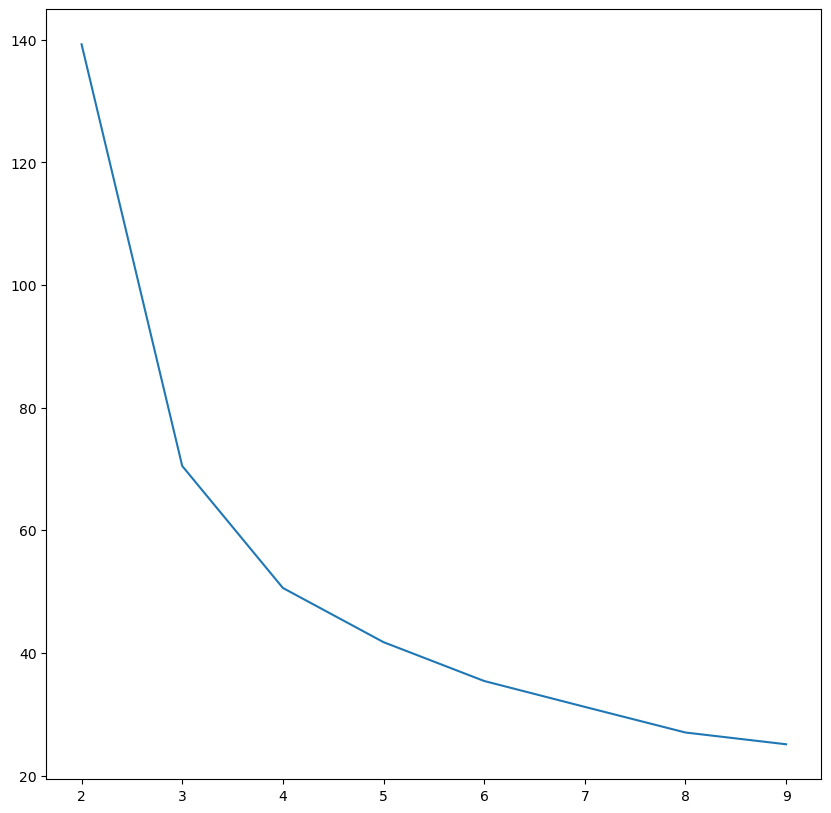

In [3]:
# 看分幾群
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]


X, y = datasets.load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=87) 

cluster_model_list = [KMeans(n_clusters=k, random_state=87).fit(X_train) for k in range(2,10)]

inertias = [model.inertia_ for model in cluster_model_list]

plt.plot(range(2,10), inertias)


In [6]:
# 拿來跟真實的標記比較
from itertools import permutations 
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

acc_train_list = list()
acc_test_list  = list()

X, y = datasets.load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=87) 

cluster_model_list = [KMeans(n_clusters=k, random_state=87).fit(X_train) for k in range(2,7)]


for k in range(2,7):
    perms = permutations(range(0,k)) 
    cluster_model = cluster_model_list[k-2]
    acc_train_max = 0
    acc_test_max  = 0
    for perm in list(perms): 
        y_train_pred = list(map(lambda x: perm[x] , cluster_model.labels_))
        y_test_pred  = list(map(lambda x: perm[x] , cluster_model.predict(X_test)))
        # print(perm, ' accuracy train:', accuracy_score(y_train, y_train_pred), 'accuracy test:', accuracy_score(y_test, y_test_pred))
        
        # 真實的標記比，紀錄最好的標記
        if accuracy_score(y_train, y_train_pred) > acc_train_max:
            acc_train_max = accuracy_score(y_train, y_train_pred)
            acc_test_max  = accuracy_score(y_test, y_test_pred)

    acc_train_list.append(acc_train_max)
    acc_test_list.append(acc_test_max)



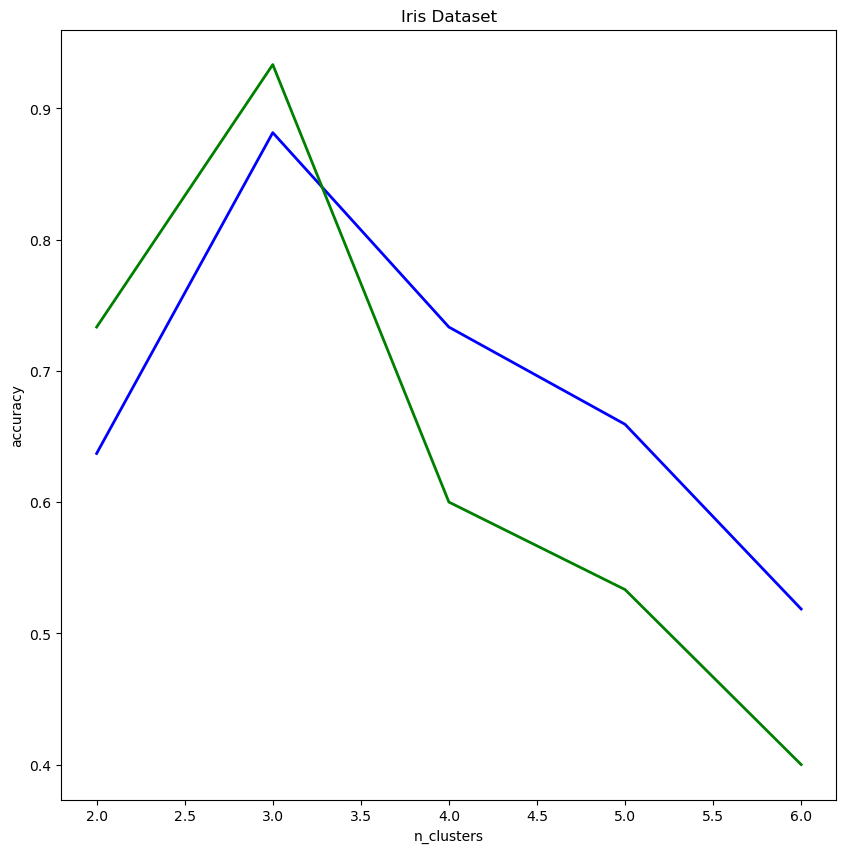

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.title('Iris Dataset')
plt.xlabel('n_clusters')
plt.ylabel('accuracy')

plt.plot(range(2,7), acc_train_list, 'b-', linewidth=2)
plt.plot(range(2,7), acc_test_list, 'g-', linewidth=2)

plt .show()


# Other Scores

我們之前用來做比較的分數 accuracy 指標，它很明顯會跟怎麼標記有關，所以在做 clustering 的時候，
分群的要件跟怎麼給類別無關，只跟怎麼評定分群的分數有關。


## rand_score

下面示範 rand_score 怎麼用，更多的 Clustering 的評價指標，請參考評價指標。


In [8]:
from sklearn.metrics import rand_score

labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

display(rand_score(labels_true, labels_pred))

labels_pred = [1, 1, 0, 0, 3, 3]

display(rand_score(labels_true, labels_pred))


0.6666666666666666

0.6666666666666666

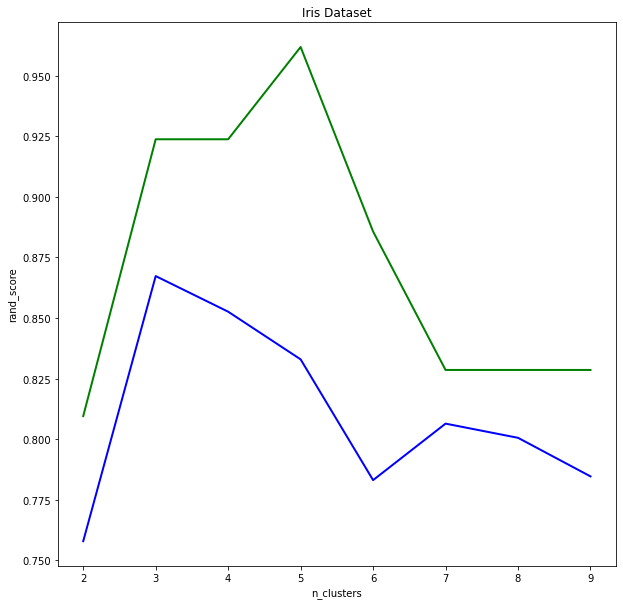

In [44]:
# 看分幾群
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import rand_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

X, y = datasets.load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=87) 

cluster_model_list = [KMeans(n_clusters=k, random_state=87).fit(X_train) for k in range(2,10)]

score_train_list = [rand_score(y_train, model.labels_) for model in cluster_model_list]
score_test_list  = [rand_score(y_test, model.predict(X_test)) for model in cluster_model_list]

plt.title('Iris Dataset')
plt.xlabel('n_clusters')
plt.ylabel('rand_score')

plt.plot(range(2,10), score_train_list, 'b-', linewidth=2)
plt.plot(range(2,10), score_test_list, 'g-', linewidth=2)
plt .show()


看完以上這些方法，大家應該可以感受到，通常使用無監督的方法，效果都會比有監督的方法效果差。